# Metropolis and Gibbs Sampling - Markov Chain Monte Carlo



Once upon a time, there is a politician visiting a chain of islands. To determine which island to visit next, each day, the politician chooses a neighboring island and compares its populations with the population of the current island. If the neighboring island has a larger population, the politician goes over. If the neighboring island has a smaller population, then the politician visits with probability $p = p_{neighbor}/p_{current}$; otherwise the politician stays on the same island. After doing this for many days, the politician will end up spending time on each island proportional to the population of each island - in other words, estimating the distribution of island populations correctly. We want to explore how a simple comparison of only two states at a time can lead to accurate estimation of a probability density.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import partial

First, we create the island. We instantiate a list with n islands and use the randint function to create the population size for each island

In [17]:
def make_islands(n, low, high):
    islands = np.random.randint(low, high, n + 2)
    islands[0] = 0
    islands[-1] = 0
    return islands

Next, we create a function to help the politician choose which island to hop on. This function takes 3 parameters, the first parameter is the list of islands created by the function above, the second parameter indicates the index of the island where the politician starts, and the third parameter denotes the number of iteration. We return an array thetas which includes the information about the islands the politician has visited

In [18]:
def choose_visit(islands, start, num_of_iteration):
    position = start
    population = islands[position]
    thetas = np.zeros(num_of_iteration + 1, dtype="int")
    thetas[0] = position
    for i in range(num_of_iteration):
        # generate sample from proposed distribution
        move = np.random.choice([-1, 1], 1)
        next_position = position + move
        # evaluate unnormalized target distribution at proposed position
        next_population = islands[next_position]
        #calculate acceptance probability
        probability = min(1, next_population / population)
        # use uniform random to decide accept/reject proposal
        if np.random.random() < probability:
            position = next_position
            population = next_population
        thetas[i + 1] = position
    return thetas

In [19]:
islands = make_islands(10, 10, 101)
thetas = choose_visit(islands, 1, 10000)

### True population portion

The ratio obtained by divided each actual island's population by the sum of population

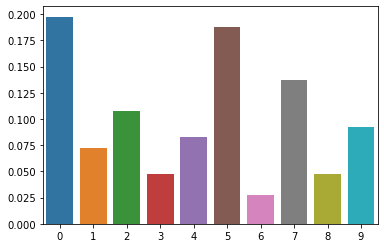

In [20]:
population_data = islands[1:-1]
population_data = population_data/population_data.sum()
sns.barplot(x=np.arange(len(population_data)), y=population_data)

### Estimated population portion

The ratio obtained by divided each estimated island's population by the sum of population<br>
Note that <b>np.bincount(x)</b> count number of occurrences of each value in array of non-negative integers. Size of the output of this method equals to the value of the max element in the list + 1 (the bins are the values from 0 to the largest number)

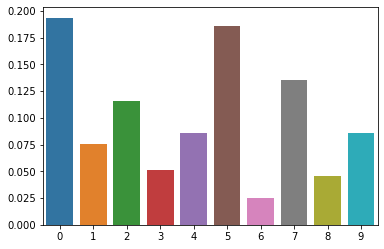

In [21]:
population_data = np.bincount(thetas)[1:]
population_data = population_data/population_data.sum()
sns.barplot(x=np.arange(len(population_data)), y=population_data)

### Generic Metropolis simulation scheme

This function takes 5 arguments: the start position, the small function target, the small function proposal, the number of iterations and number of burn-ins. We create two variables, <i>current</i> to track the current position and <i>post</i> to store a list of position. <br>

In [22]:
def metropolis(start, target, proposal, num_iteration, num_burn_in=0):
    current = start
    post = [current]
    for i in range(num_iteration):
        proposed = proposal(current)
        p = min(target(proposed)/target(current), 1)
        if np.random.random() < p:
            current = proposed
        post.append(current)
    return post[num_burn_in:]

### Apply to island hopper

First, we pass an argument x to the target function; this function would output the population at island x. Next, the function proposal takes an argument x (the position), makes a move (1 or -1) and return the next position

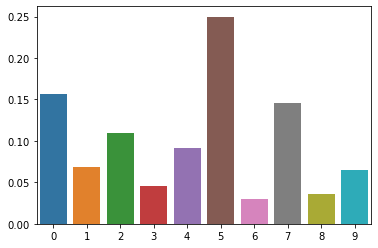

In [23]:
target = lambda x: islands[x]
proposal = lambda x: x + np.random.choice([-1, 1])
post = metropolis(1, target, proposal, 2000)
data = np.bincount(post)[1:]
data = data/data.sum()
sns.barplot(x=np.arange(len(data)), y=data)

## Bayesian Data Analysis

Posterior distribution: <br>
$$p(\theta \ | \ X) = \frac{p(X \ | \ \theta) p(\theta)}{p(X)}$$
<br>
We denote $p(X)$ as:<br>
$$p(X) = \int p(X \ | \ \theta^*) p(\theta^*)d\theta^*$$
<br>
Here:<br>
- $p(X \ | \ \theta)$ is the likelihood<br>
- $p(\theta)$ is the prior<br>
- $p(X)$ is the marginal likelihood

The computational issue is the difficulty of evaluating the integral in the denominator. There are many ways to address this difficulty, including: <br>
- In cases with conjugate priors (with conjugate priors, the posterior has the same distribution family as the prior), we can get closed form solutions <br>
- We can use numerical integration<br>
- We can approximate the functions used to calculate the posterior with simpler functions and show that the resulting approximate posterior is “close” to true posterior (variational Bayes) <br>
- We can use Monte Carlo methods, of which the most important is Markov Chain Monte Carlo (MCMC). In simple Monte Carlo integration, we want to estimate the integral $\int f(x)p(x)dx$. With Bayesian models, the distribution $p(x)$ in the integral is the posterior<br>
<br>
$$p(x) = p(\theta \ | \ X) = \frac{p(X \ | \ \theta) p(\theta)}{\int p(X \ | \ \theta^*) p(\theta^*)d\theta^* }$$
<br>
- MCMC allows to sample from the posterior distribution - the samples will not be independent, unlike simple Monte Carlo integration, but we can compensate by drawing a larger number of samples.


### Example: Estimating the bias of a coin given a sample consisting of n tosses

Idea:<br>
If we use a beta distribution as the prior, then the posterior distribution has a closed form solution. Some notes:<br>
- We need to choose a prior distribution family (i.e. the beta here) as well as its parameters<br>
- The posterior depends on both the prior and the data (As the amount of data becomes large, the posterior approximates the MLE) <br>
- The mode of the posterior distribution is known as the maximum a posteriori (MAP) estimate (On the other hand, MLE is the mode of likelihood. In fact, MLE is a special case of MAP, where the prior is uniform)<br>
- For simplification, MLE is basically finding $\theta$ s.t $P(x | \theta)$ is maximized

![Image of something](https://miro.medium.com/max/840/1*8ouhYclbly_NBnRREZ_d8A.png)

![Image of something](https://miro.medium.com/max/2400/1*5QkPiTyCK6Ns6nMfrV4OEQ.png)

![Image of somethng](https://miro.medium.com/max/700/1*apbMK3YGujmqFsbe0WmE_Q.png)

![Image of something](https://miro.medium.com/max/700/1*Nm1nuOHEKstalnaUQar3Yw.png)

![Image of something](https://miro.medium.com/max/648/1*JReB_7TGCTnkOoJHu2ALyg.png)

![Image of something](https://miro.medium.com/max/646/1*9yAUTXbCzILvggoQQHgRPA.png)

In [24]:
import scipy.stats as stats
from scipy.stats import beta

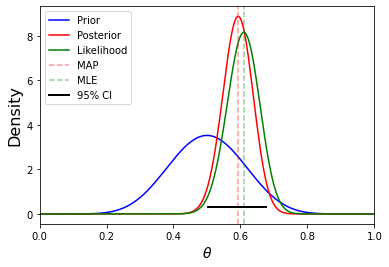

In [25]:
n = 100
h = 61
p = h/n #probability of head
rv = stats.binom(n, p)
mu = rv.mean()

a, b = 10, 10
prior = stats.beta(a, b)
post = stats.beta(h+a, n-h+b)
ci = post.interval(0.95)

thetas = np.linspace(0, 1, 200)
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.plot(thetas, n*stats.binom(n, thetas).pmf(h), label='Likelihood', c='green')
plt.axvline((h+a-1)/(n+a+b-2), c='red', linestyle='dashed', alpha=0.4, label='MAP') #MAP calculation
plt.axvline(mu/n, c='green', linestyle='dashed', alpha=0.4, label='MLE')
plt.xlim([0, 1])
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend(loc='upper left')

### Numerical integration

To calculate the posterior, we use a range of values for $\theta$. We find the prior and likelihood for each value of $\theta$, and for the marginal likelihood, we replace the integral with the equivalent sum:<br>
$$p(X) = \sum_{\theta^*} p(X | \theta^*) p(\theta^*)$$
<br>
<b>Advantage of this method</b>: Prior doesn't have to be a conjugate <br>
<b>Disadvantage</b>: Very computationally expensive

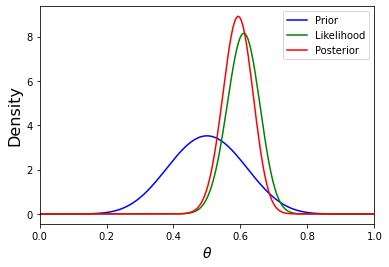

In [26]:
thetas = np.linspace(0, 1, 200)
prior = stats.beta(a, b)

post = prior.pdf(thetas) * stats.binom(n, thetas).pmf(h)
# Normalzie so volume is 1
post /= (post.sum() / len(thetas))

plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, n*stats.binom(n, thetas).pmf(h), label='Likelihood', c='green')
plt.plot(thetas, post, label='Posterior', c='red')
plt.xlim([0, 1])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend()

### Markov Chain Monte Carlo

3 common variants - Metroplis, Metropolis-Hastings and Gibbs sampling<br>
With MCMC, we draw samples from a proposal distribution so that each draw depends only on the state of the previous draw. Moreover, not all samples are used - instead we set up acceptance criteria for each draw based on comparing successive states with respect to a target distribution to ensure that we get the posterior distribution of interest.The nice thing here is that the target distribution only needs to be proportional to the posterior distribution<br>
<br>
$$posterior \propto likelihood \times prior$$
<br>
After some time, the Markov chain of accepted draws will converge to the posterior distribution of interest, and we can use those samples as (correlated) draws from the posterior distribution, and find functions of the posterior distribution in the same way as for vanilla Monte Carlo integration.

### Metropolis-Hastings random walk algorithm for estimating the bias of a coin

To carry out the Metropolis-Hastings algorithm, we need to draw random samples from the following distributions:<br>
- the standard uniform distribution<br>
- a proposal distribution $p(x)$ that we choose to be $\mathcal{N}(0, \sigma)$<br>
- the target distribution $g(x)$ which is proportional to the posterior probability

Give an initial guest for $\theta$ with positive probability of being drawn, the Metropolis-Hastings algorithm proceeds as follows:<br>
- Update new proposed value $\theta_p$ such that $\theta_p = \theta + \Delta\theta$ where $\Delta \theta \sim \mathcal{N}(0, \sigma)$<br>
- Calculate new ratio: <br>
$$\rho = \frac{g(\theta_p \ | \ X)}{g(\theta \ | \ X)}$$
<br>
where $g$ is the posterior probability<br>
- If the proposal distribution is not symmetrical, we need to weight the acceptance probability to maintain detailed balance (reversibility) of the stationary distribution, and instead calculate
$$\rho = \frac{g(\theta_p \ | \ X) p(\theta \ | \ \theta_p)}{g(\theta \ | \ X) p(\theta_p \ | \ \theta)}$$

Since we are taking ratios, the denominator cancels any distribution proportional to $g$ will also work - so we can use:<br>
- If $\rho \geqslant 1$ then set $\theta = \theta_p$<br>
- If $\rho < 1$ then set $\theta = \theta_p$ with probability $\rho$, otherwise set $\theta = \theta$ (this is where we use the standard uniform distribution)<br>
- Repeat the earlier steps

After some number of iterations $k$, the samples $\theta_{k+1}, \theta_{k+2},…$ will be sampling from the posterior distributions. Here are some intuition:
- We accept a proposed move to $\theta_{k+1}$ whenever the density of the (unnormalized) target distribution at $\theta_{k+1}$ is larger than the value of $\theta_{k}$ - so $\theta$ will more often be found in places where the target distribution is denser<br>
- If this was all we accepted, $\theta$ would get stuck at a local mode of the target distribution, so we also accept occasional moves to lower density regions - it turns out that the correct probability of doing so is given by the ratio $\rho$ <br>
- The acceptance criteria only looks at ratios of the target distribution, so the denominator cancels out and does not matter - that is why we only need samples from a distribution proportional to the posterior distribution <br>
- So, $\theta$ will be expected to bounce around in such a way that its spends its time in places proportional to the density of the posterior distribution - that is, $\theta$ is a draw from the posterior distribution

<b>Additional Notes</b>:
Different proposal distributions can be used for Metropolis-Hastings<br>
- The independence sampler uses a proposal distribution that is independent of the current value of $\theta$. In this case, the proposal distribution needs to be similar to the posterior distribution for efficiency, while ensuring that the acceptance ratio is bounded in the tail region of the posterior<br>
- The random walk sampler (used in this example) takes a random step centered at the current value of $\theta$ - efficiency is a trade-off between small step size with high probability of acceptance and large step sizes with low probability of acceptance. Note (picture will be sketched in class) that the random walk may take a long time to traverse narrow regions of the probability distribution. Changing the step size (e.g. scaling $\Sigma$ for a multivariate normal proposal distribution) so that a target proportion of proposals are accepted is known as tuning.


In [27]:
def target(lik, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return lik(n, theta).pmf(h) * prior.pdf(theta) #target is proportional to likelihood * prior

n = 100
h = 61
a = 10
b = 10
lik = stats.binom
prior = stats.beta(a, b)
sigma = 0.3

naccept = 0
theta = 0.1
num_of_iteration = 10000
samples = np.zeros(num_of_iteration + 1)
samples[0] = theta
for i in range(num_of_iteration):
    theta_p = theta + stats.norm(0, sigma).rvs()
    rho = min(1, target(lik, prior, n, h, theta_p)/target(lik, prior, n, h, theta ))
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta
nmcmc = len(samples)//2
print("Efficiency = ", naccept/num_of_iteration)

Efficiency =  0.1872


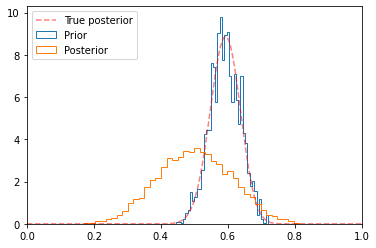

In [28]:
post = stats.beta(h+a, n-h+b)

plt.hist(samples[nmcmc:], 40, histtype='step', density=True, linewidth=1, label='Prior');
plt.hist(prior.rvs(nmcmc), 40, histtype='step', density=True, linewidth=1, label='Posterior');
plt.plot(thetas, post.pdf(thetas), c='red', linestyle='--', alpha=0.5, label='True posterior')
plt.xlim([0,1]);
plt.legend(loc='upper left')

### Assessing for convergence

Trace plots are often used to informally assess for stochastic convergence.

In [29]:
def mh_coin(num_of_iteration, n, h, theta, lik, prior, sigma):
    samples = [theta]
    while len(samples) < num_of_iteration:
        theta_p = theta + stats.norm(0, sigma).rvs()
        rho = min(1, target(lik, prior, n, h, theta_p)/target(lik, prior, n, h, theta ))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples.append(theta)
    return samples

In [30]:
n = 100
h = 61
lik = stats.binom
prior = stats.beta(a, b)
sigma = 0.05
niters = 100

sampless = [mh_coin(niters, n, h, theta, lik, prior, sigma) for theta in np.arange(0.1, 1, 0.2)]

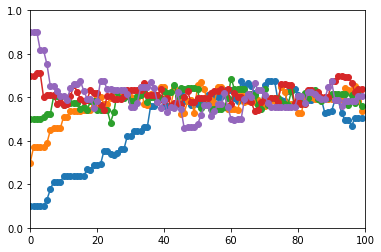

In [31]:
# Convergence of multiple chains

for samples in sampless:
    plt.plot(samples, '-o')
plt.xlim([0, niters])
plt.ylim([0, 1]);

### Why does Metropolis-Hastings work?

There are two main ideas - first that the samples generated by MCMC constitute a Markov chain, and that this Markov chain has a unique stationary distribution that is always reached if we generate a very large number of samples. The second idea is to show that this stationary distribution is exactly the posterior distribution that we are looking for.



### 1. There are a unique stationary distribution

Since possible transitions depend only on the current and the proposed values of $θ$, the successive values of $θ$ in a Metropolis-Hastings sample constitute a Markov chain. Recall that for a Markov chain with a transition matrix $T$<br>
$$\pi = \pi T$$
<br>
Here, $\pi$ is the stationary distribution.  If it is possible to go from any state to any other state, then the matrix is irreducible. If in addition, it is not possible to get stuck in an oscillation, then the matrix is also aperiodic or mixing. For finite state spaces, irreducibility and aperiodicity guarantee the existence of a unique stationary state. For continuous state space, we need an additional property of positive recurrence - starting from any state, the expected time to come back to the original state must be finite. If we have all 3 properties of irreducibility, aperiodicity and positive recurrence, then there is a unique stationary distribution. <br>
Bayesian texts take ergodicity to mean irreducibility, aperiodicity and positive recurrence. For another intuitive perspective, the random walk Metropolis-Hasting algorithm is analogous to a diffusion process. Since all states are communicating (by design), eventually the system will settle into an equilibrium state. This is analogous to converging on the stationary state.

### 2. The stationary state is the posterior probability distribution

Suppose we have a two-state system where the posterior probabilities are $\theta$ and $1−\theta$. Suppose $\theta<0.5$. So we have the following picture of the Metropolis-Hastings algorithm:

![Image](https://people.duke.edu/~ccc14/sta-663-2017/mcmc.png)

We find the stationary distribution $\pi = \left( \begin{array}{cc} p & 1-p \end{array} \right)$ by solving:<br>
$$\begin{split}\begin{align}
\left( \begin{array}{cc} p & 1-p \end{array} \right) &=
\left( \begin{array}{cc} p & 1-p \end{array} \right) \left(
\begin{array}{cc}
0 & 1  \\
\frac{\theta}{1-\theta} & 1-\frac{\theta}{1-\theta}
\end{array}
\right)
\end{align}\end{split}$$
<br>
The result $\pi = \left( \begin{array}{cc} \theta & 1-\theta \end{array} \right)$ is a posterior distribution.

The final point is that a stationary distribution has to follow the detailed balance (reversibility) criterion that says that the probability of being in state $x$ and moving to state $y$ must be the same as the probability of being in state $y$ and moving to state $x$. Or, more briefly<br>
### $$\pi(x)T(x \to y) = \pi(y)T(y \to x)$$
<br>
The criterion for this condition to be true:<br>
$$\min \left(1, \frac{g(\theta_p \ | \ X) p(\theta \ | \ \theta_p)}{g(\theta \ | \ X) p(\theta_p \ | \ \theta)} \right)$$

### Intuition

We want the stationary distribution $\pi (x)$ to be the posterior distribution $P(x)$. So we set<br><br>
$$P(x)T(x \to y) = P(y)T(y \to x)$$<br>
Rearranging:<br><br>
$$\frac{T(x \to y)}{T(y \to x)} = \frac{P(y)}{P(x)}$$<br>
We split the transition probability into separate proposal $q$ and acceptance $A$ parts, and after a little algebraic rearrangement get<br><br>
$$\frac{A(x \to y)}{A(y \to x)} = \frac{P(y) \, q(y \to x)}{P(x) \, q(x \to y)}$$<br>
An acceptance probability that meets this condition is<br><br>
$$A(x \to y) = \min \left(1, \frac{P(y) \, q(y \to x)}{P(x) \, q(x \to y)} \right)$$<br>
since $A$ in the numerator and denominator are both bounded above by 1.

### The Gibbs Sampler

Suppose we have a vector of parameters $\theta = (\theta_1, \theta_2, \dots, \theta_k)$, and we want to estimate the joint posterior distribution $p(\theta | X)$. Suppose we can find and draw random samples from all the conditional distributions:<br>
$$\begin{split}p(\theta_1 | \theta_2, \dots \theta_k, X) \\
p(\theta_2 | \theta_1, \dots \theta_k, X) \\
\dots \\
p(\theta_k | \theta_1, \theta_2, \dots, X)\end{split}$$
<br>
With Gibbs sampling, the Markov chain is constructed by sampling from the conditional distribution for each parameter $\theta_i$ in turn, treating all other parameters as observed. When we have finished iterating over all parameters, we are said to have completed one cycle of the Gibbs sampler. Since hierarchical models are typically set up as products of conditional distributions, the Gibbs sampler is ubiquitous in Bayesian modeling. Where it is difficult to sample from a conditional distribution, we can sample using a Metropolis-Hastings algorithm instead - this is known as Metropolis within Gibbs.<br><br>
Gibbs sampling is a type of random walk through parameter space, and hence can be thought of as a Metropolis-Hastings algorithm with a special proposal distribution. At each iteration in the cycle, we are drawing a proposal for a new value of a particular parameter, where the proposal distribution is the conditional posterior probability of that parameter. This means that the proposal move is always accepted. Hence, if we can draw samples from the conditional distributions, Gibbs sampling can be much more efficient than regular Metropolis-Hastings. More formally, we want to show that<br><br>
$$ \frac{P(y) \, q(y \to x)}{P(x) \, q(x \to y)} = 1$$<br>


We start by noting that $P(x_i)$ is the same as $P(y_i)$ since apart from the component $i$, the old state and the proposed new state are identical in Gibbs sampling. We also recall that<br><br>
$$P(x_i \mid x_{-i}) \, P(x_{-i}) = P(x_i, x_{-i} = P(x)$$<br>
by definition of conditional probability. So we have<br><br>
$$\begin{align}
\frac{P(y) \, q(y \to x)}{P(x) \, q(x \to y)} &= \frac{P(y_i \mid y_{-1}) \, P(y_{-i})\, P(x_i \mid x_{-i}) }{P(x_i \mid x_{-i}) \, P(x_{-i})\, P(y_i \mid y_{-1})} &= 1
\end{align}$$

### Example

We want to estimate the bias of two coins given sample pairs $(z_1,n_1)$ and $(z_2,n_2)$ where $z_i$ is the number of heads in $n_i$ tosses for coin $i$

In [32]:
def bern(theta, z, N):
    """Bernoulli likelihood with N trials and z successes."""
    return np.clip(theta**z * (1-theta)**(N-z), 0, 1)

In [33]:
def bern2(theta1, theta2, z1, z2, N1, N2):
    """Bernoulli likelihood with N trials and z successes."""
    return bern(theta1, z1, N1) * bern(theta2, z2, N2)

In [34]:
def make_thetas(xmin, xmax, n):
    xs = np.linspace(xmin, xmax, n)
    widths =(xs[1:] - xs[:-1])/2.0
    thetas = xs[:-1]+ widths
    return thetas

In [52]:
from mpl_toolkits.mplot3d import Axes3D

def make_plots(X, Y, prior, likelihood, posterior, projection=None):
    fig, ax = plt.subplots(1,3, subplot_kw=dict(projection=projection, aspect='auto'), figsize=(12,3))
    if projection == '3d':
        ax[0].plot_surface(X, Y, prior, alpha=0.3, cmap=plt.cm.jet)
        ax[1].plot_surface(X, Y, likelihood, alpha=0.3, cmap=plt.cm.jet)
        ax[2].plot_surface(X, Y, posterior, alpha=0.3, cmap=plt.cm.jet)
        for ax_ in ax: ax_._axis3don = False
    else:
        ax[0].contour(X, Y, prior, cmap=plt.cm.jet)
        ax[1].contour(X, Y, likelihood, cmap=plt.cm.jet)
        ax[2].contour(X, Y, posterior, cmap=plt.cm.jet)
    ax[0].set_title('Prior')
    ax[1].set_title('Likelihood')
    ax[2].set_title('Posterior')
    plt.tight_layout()

In [53]:
thetas1 = make_thetas(0, 1, 101)
thetas2 = make_thetas(0, 1, 101)
X, Y = np.meshgrid(thetas1, thetas2)

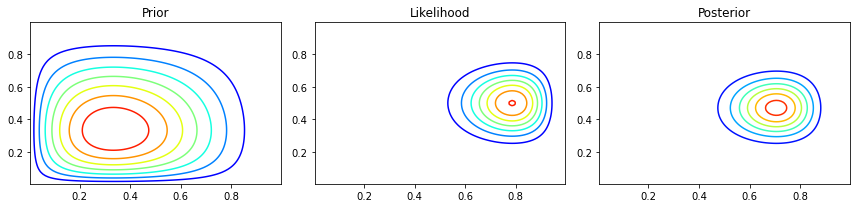

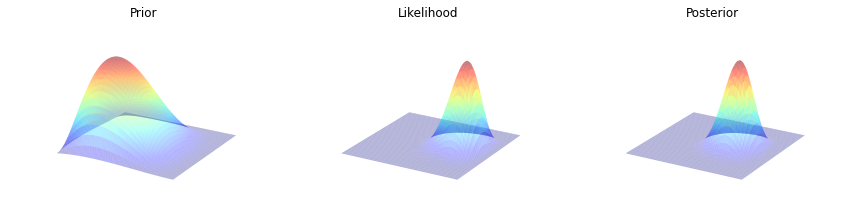

In [54]:
a = 2
b = 3

z1 = 11
N1 = 14
z2 = 7
N2 = 14

prior = stats.beta(a, b).pdf(X) * stats.beta(a, b).pdf(Y)
likelihood = bern2(X, Y, z1, z2, N1, N2)
posterior = stats.beta(a + z1, b + N1 - z1).pdf(X) * stats.beta(a + z2, b + N2 - z2).pdf(Y)
make_plots(X, Y, prior, likelihood, posterior)
make_plots(X, Y, prior, likelihood, posterior, projection='3d')

### Grid approximation

In [55]:
def c2d(thetas1, thetas2, pdf):
    width1 = thetas1[1] - thetas1[0]
    width2 = thetas2[1] - thetas2[0]
    area = width1 * width2
    pmf = pdf * area
    pmf /= pmf.sum()
    return pmf

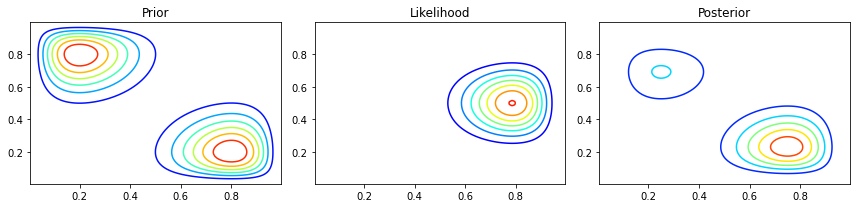

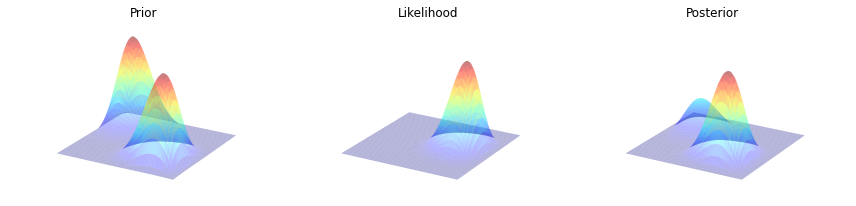

In [56]:
_prior = bern2(X, Y, 2, 8, 10, 10) + bern2(X, Y, 8, 2, 10, 10)
prior_grid = c2d(thetas1, thetas2, _prior)
_likelihood = bern2(X, Y, 1, 1, 2, 3)
posterior_grid = _likelihood * prior_grid
posterior_grid /= posterior_grid.sum()
make_plots(X, Y, prior_grid, likelihood, posterior_grid)
make_plots(X, Y, prior_grid, likelihood, posterior_grid, projection='3d')

### Metropolis

In [57]:
a = 2
b = 3

z1 = 11
N1 = 14
z2 = 7
N2 = 14

prior = lambda theta1, theta2: stats.beta(a, b).pdf(theta1) * stats.beta(a, b).pdf(theta2)
lik = partial(bern2, z1=z1, z2=z2, N1=N1, N2=N2)
target = lambda theta1, theta2: prior(theta1, theta2) * lik(theta1, theta2)

theta = np.array([0.5, 0.5])
niters = 10000
burnin = 500
sigma = np.diag([0.2,0.2])

thetas = np.zeros((niters-burnin, 2), np.float)
for i in range(niters):
    new_theta = stats.multivariate_normal(theta, sigma).rvs()
    p = min(target(*new_theta)/target(*theta), 1)
    if np.random.rand() < p:
        theta = new_theta
    if i >= burnin:
        thetas[i-burnin] = theta

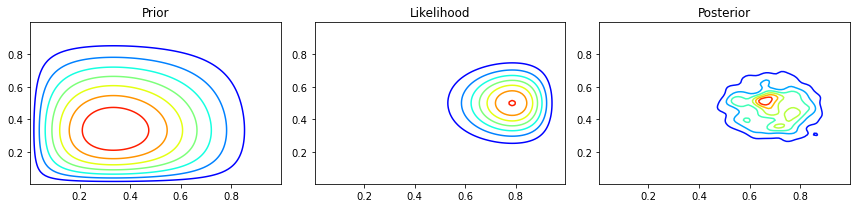

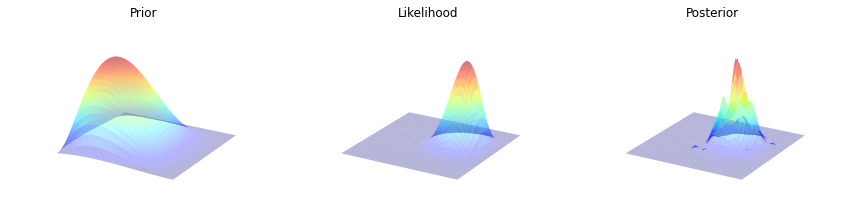

In [58]:
kde = stats.gaussian_kde(thetas.T)
XY = np.vstack([X.ravel(), Y.ravel()])
posterior_metroplis = kde(XY).reshape(X.shape)
make_plots(X, Y, prior(X, Y), lik(X, Y), posterior_metroplis)
make_plots(X, Y, prior(X, Y), lik(X, Y), posterior_metroplis, projection='3d')

### Gibbs

In [59]:
a = 2
b = 3

z1 = 11
N1 = 14
z2 = 7
N2 = 14

prior = lambda theta1, theta2: stats.beta(a, b).pdf(theta1) * stats.beta(a, b).pdf(theta2)
lik = partial(bern2, z1=z1, z2=z2, N1=N1, N2=N2)
target = lambda theta1, theta2: prior(theta1, theta2) * lik(theta1, theta2)

theta = np.array([0.5, 0.5])
niters = 10000
burnin = 500
sigma = np.diag([0.2,0.2])

thetas = np.zeros((niters-burnin,2), np.float)
for i in range(niters):
    theta = [stats.beta(a + z1, b + N1 - z1).rvs(), theta[1]]
    theta = [theta[0], stats.beta(a + z2, b + N2 - z2).rvs()]

    if i >= burnin:
        thetas[i-burnin] = theta

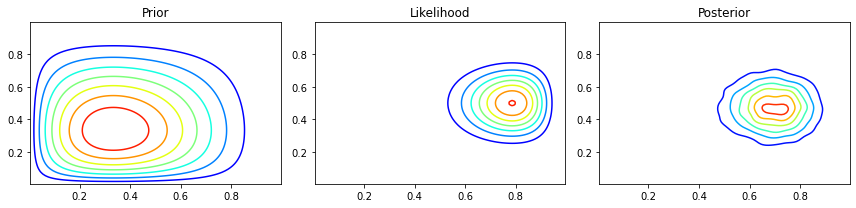

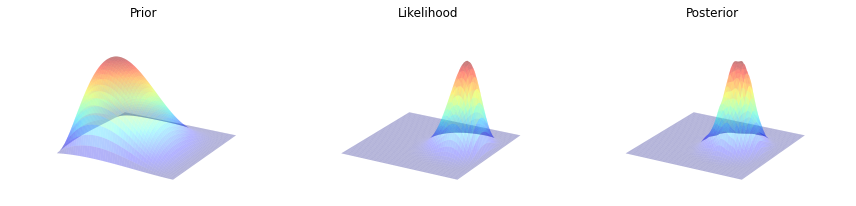

In [60]:
kde = stats.gaussian_kde(thetas.T)
XY = np.vstack([X.ravel(), Y.ravel()])
posterior_gibbs = kde(XY).reshape(X.shape)
make_plots(X, Y, prior(X, Y), lik(X, Y), posterior_gibbs)
make_plots(X, Y, prior(X, Y), lik(X, Y), posterior_gibbs, projection='3d')